In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df =  pd.read_csv(r"/content/fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,11697.000000,1.169700e+04,11697.000000,11697.000000,11697.000000,11697.000000,1.169700e+04,1.169600e+04,11696.000000,11696.000000,11696.000000
mean,5848.000000,4.065538e+17,66.241288,48583.520988,38.491370,-90.029371,9.471794e+04,1.371949e+09,38.477973,-90.028840,0.002479
std,3376.777384,1.295805e+18,124.015784,26706.800199,5.112304,13.575833,3.222010e+05,7.917888e+04,5.144570,13.592734,0.049735
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,2924.000000,1.800429e+14,9.200000,26237.000000,34.509100,-96.618400,7.820000e+02,1.371885e+09,34.627043,-96.595760,0.000000
50%,5848.000000,3.518669e+15,43.770000,48034.000000,39.342600,-86.965700,2.691000e+03,1.371941e+09,39.332037,-87.238137,0.000000
75%,8772.000000,4.634956e+15,79.770000,72011.000000,42.014400,-80.175200,2.163500e+04,1.372010e+09,41.997231,-80.270511,0.000000
max,11696.000000,4.992346e+18,3396.840000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372113e+09,65.951727,-67.122946,1.000000


In [6]:
df.shape

(11697, 23)

In [7]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [9]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  11697 non-null  object 
 1   cc_num                 11697 non-null  int64  
 2   merchant               11697 non-null  object 
 3   category               11697 non-null  object 
 4   amt                    11697 non-null  float64
 5   gender                 11697 non-null  object 
 6   city                   11697 non-null  object 
 7   zip                    11697 non-null  int64  
 8   lat                    11697 non-null  float64
 9   long                   11697 non-null  float64
 10  city_pop               11697 non-null  int64  
 11  job                    11697 non-null  object 
 12  dob                    11697 non-null  object 
 13  merch_lat              11696 non-null  float64
 14  merch_long             11696 non-null  float64
 15  is

In [12]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

In [13]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0.0


In [14]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [16]:
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
df['age_cust'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
df.drop(columns='dob', inplace=True)

In [17]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age_cust
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0.0,52
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0.0,30
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0.0,50
3,2020-06-21 12:15:15,3591919803438423,Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0.0,33
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0.0,65


In [18]:
df['lat_dist'] = abs(round(df['merch_lat']-df['lat'],2))
df['long_dist'] = abs(round(df['merch_long']-df['long'],2))

In [19]:
df.drop(columns=['lat','long','merch_lat','merch_long','trans_date_trans_time'],inplace=True)

In [20]:
df.head()

,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,age_cust,lat_dist,long_dist
0,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,333497,Mechanical engineer,0.0,52,0.02,0.27
1,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,302,"Sales professional, IT",0.0,30,0.87,0.48
2,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,34496,"Librarian, public",0.0,50,0.18,0.66
3,3591919803438423,Haley Group,misc_pos,60.05,M,Titusville,32780,54767,Set designer,0.0,33,0.24,0.06
4,3526826139003047,Johnston-Casper,travel,3.19,M,Falmouth,49632,1126,Furniture designer,0.0,65,0.71,0.87


In [21]:
df.describe()

,cc_num,amt,zip,city_pop,is_fraud,age_cust,lat_dist,long_dist
count,1.169700e+04,11697.000000,11697.000000,1.169700e+04,11696.000000,11697.000000,11696.000000,11696.000000
mean,4.065538e+17,66.241288,48583.520988,9.471794e+04,0.002479,46.156621,0.502430,0.499711
std,1.295805e+18,124.015784,26706.800199,3.222010e+05,0.049735,17.393370,0.287907,0.287201
min,6.041621e+10,1.000000,1257.000000,2.300000e+01,0.000000,15.000000,0.000000,0.000000
25%,1.800429e+14,9.200000,26237.000000,7.820000e+02,0.000000,33.000000,0.250000,0.250000
50%,3.518669e+15,43.770000,48034.000000,2.691000e+03,0.000000,44.000000,0.500000,0.500000
75%,4.634956e+15,79.770000,72011.000000,2.163500e+04,0.000000,57.000000,0.750000,0.750000
max,4.992346e+18,3396.840000,99783.000000,2.906700e+06,1.000000,96.000000,1.000000,1.000000


In [22]:
df.describe(include='object')

,merchant,category,gender,city,job
count,11697,11697,11697,11697,11697
unique,693,14,2,835,475
top,Cormier LLC,home,F,Phoenix,IT trainer
freq,42,1211,6484,61,83


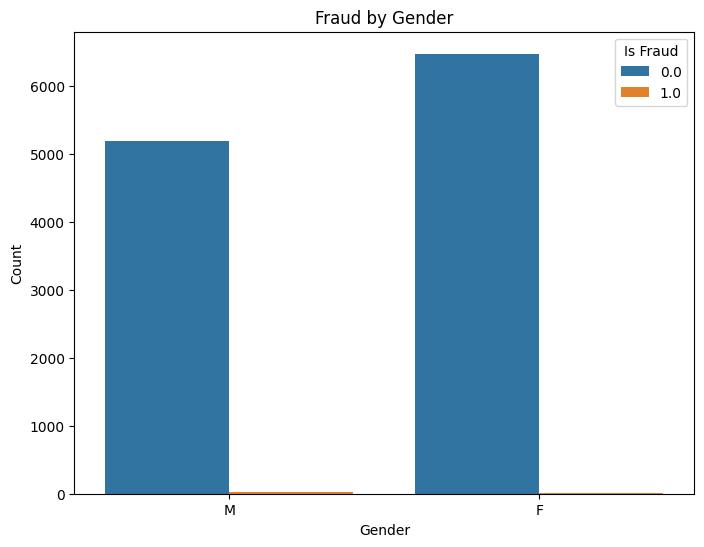

In [23]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'gender', hue ='is_fraud', data = df)
plt.title('Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Is Fraud')
plt.show()

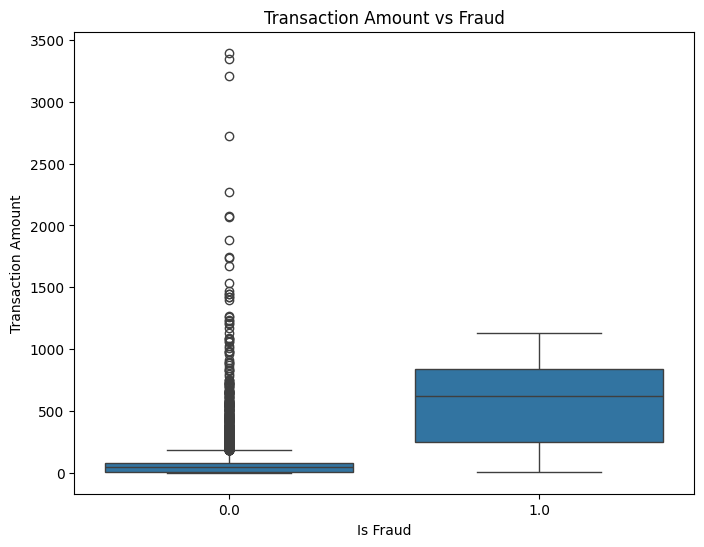

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'is_fraud' , y = 'amt' , data = df)
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()

In [25]:
fraud_count_merch = df.groupby("merchant")["is_fraud"].sum()
top10_merch = fraud_count_merch.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rodriguez, Yost and Jenkins'),
  Text(1, 0, 'Baumbach, Strosin and Nicolas'),
  Text(2, 0, 'Bednar Group'),
  Text(3, 0, 'DuBuque LLC'),
  Text(4, 0, 'Durgan-Auer'),
  Text(5, 0, 'Goldner, Kovacek and Abbott'),
  Text(6, 0, 'Haley, Batz and Auer'),
  Text(7, 0, "Hamill-D'Amore"),
  Text(8, 0, 'Heathcote, Yost and Kertzmann'),
  Text(9, 0, 'Heidenreich PLC')])

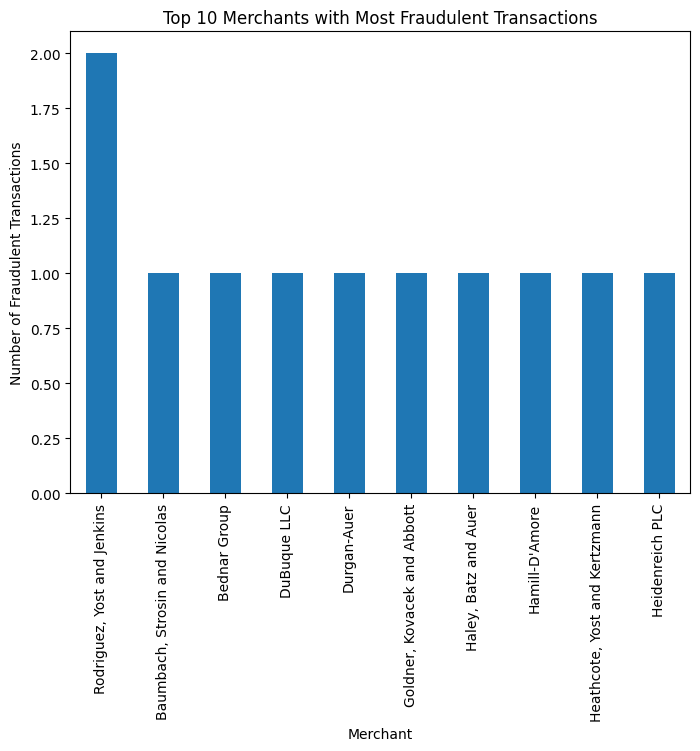

In [26]:
plt.figure(figsize=(8,6))
top10_merch.plot(kind="bar")
plt.xlabel("Merchant")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Merchants with Most Fraudulent Transactions")
plt.xticks(rotation=90)

In [27]:
fraud_counts_cat = df.groupby("category")["is_fraud"].sum()
top10_cat = fraud_counts_cat.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'grocery_pos'),
  Text(1, 0, 'shopping_net'),
  Text(2, 0, 'misc_net'),
  Text(3, 0, 'health_fitness'),
  Text(4, 0, 'shopping_pos'),
  Text(5, 0, 'entertainment'),
  Text(6, 0, 'gas_transport'),
  Text(7, 0, 'grocery_net'),
  Text(8, 0, 'home'),
  Text(9, 0, 'misc_pos')])

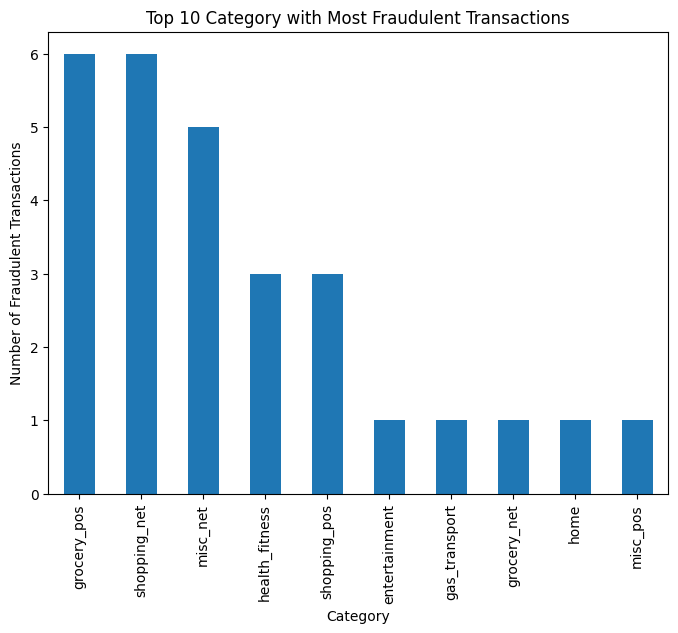

In [28]:
plt.figure(figsize=(8,6))
top10_cat.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Category with Most Fraudulent Transactions")
plt.xticks(rotation=90)

In [29]:
fraud_counts_job = df.groupby("job")["is_fraud"].sum()
top10_job = fraud_counts_job.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Librarian, public'),
  Text(1, 0, 'Herbalist'),
  Text(2, 0, 'Scientist, research (maths)'),
  Text(3, 0, 'Public relations officer'),
  Text(4, 0, 'Cytogeneticist'),
  Text(5, 0, 'Academic librarian'),
  Text(6, 0, 'Accountant, chartered certified'),
  Text(7, 0, 'Accountant, chartered public finance'),
  Text(8, 0, 'Accounting technician'),
  Text(9, 0, 'Acupuncturist')])

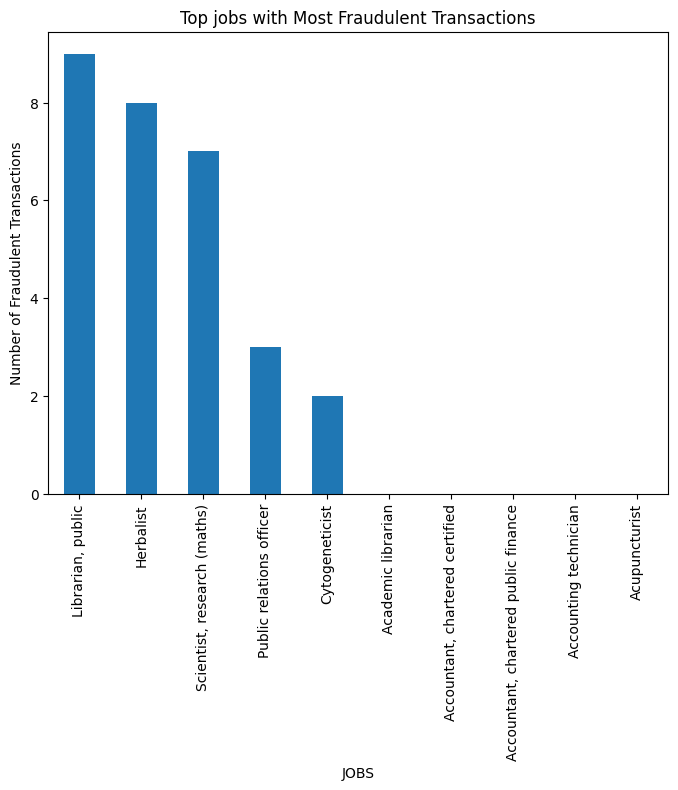

In [30]:
plt.figure(figsize=(8,6))
top10_job.plot(kind="bar")
plt.xlabel("JOBS")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top jobs with Most Fraudulent Transactions")
plt.xticks(rotation=90)

In [31]:
age_ranges = {
    "Child": (0, 13),
    "Teen": (13, 20),
    "Adult": (20, 65),
    "Senior": (65, None)}

In [32]:
df["age_group"] = np.where(df["age_cust"] < 13, "Child", np.where(df["age_cust"] < 20, "Teen", np.where(df["age_cust"] < 55, "Adult", "Senior")))

In [33]:
df["age_group"] = pd.cut(df["age_cust"], bins=[0, 13, 20, 55, 90], labels=["Child", "Teen", "Adult", "Senior"], include_lowest=True)

In [34]:
df.head()

,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,age_cust,lat_dist,long_dist,age_group
0,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,333497,Mechanical engineer,0.0,52,0.02,0.27,Adult
1,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,302,"Sales professional, IT",0.0,30,0.87,0.48,Adult
2,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,34496,"Librarian, public",0.0,50,0.18,0.66,Adult
3,3591919803438423,Haley Group,misc_pos,60.05,M,Titusville,32780,54767,Set designer,0.0,33,0.24,0.06,Adult
4,3526826139003047,Johnston-Casper,travel,3.19,M,Falmouth,49632,1126,Furniture designer,0.0,65,0.71,0.87,Senior


In [35]:
fraud_counts_age = df.groupby("age_group")["is_fraud"].sum()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Child'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Adult'),
  Text(3, 0, 'Senior')])

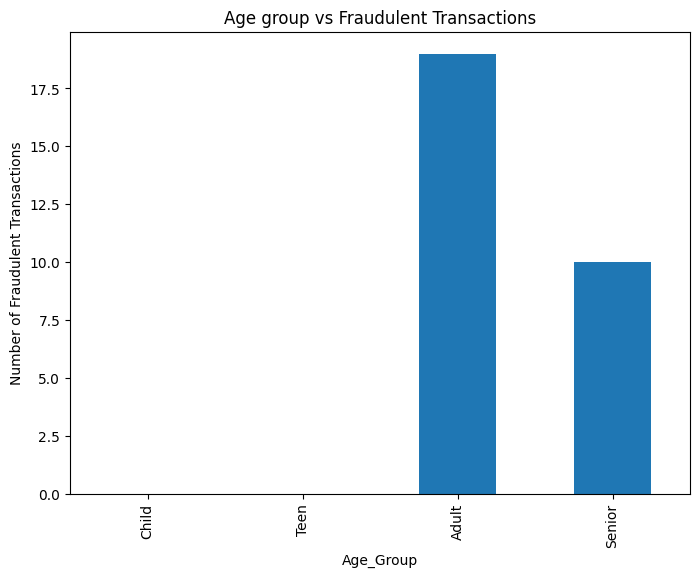

In [36]:
plt.figure(figsize=(8,6))
fraud_counts_age.plot(kind="bar")
plt.xlabel("Age_Group")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Age group vs Fraudulent Transactions")
plt.xticks(rotation=90)

In [38]:
df.drop(columns=['merchant', 'job', 'category', 'city'],inplace=True)

In [39]:
dummies = pd.get_dummies(df, drop_first=True, dtype="int32",
        columns=["age_group", "gender"])

In [40]:
dummies

,cc_num,amt,zip,city_pop,is_fraud,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
0,2291163933867244,2.86,29209,333497,0.0,52,0.02,0.27,0,1,0,1
1,3573030041201292,29.84,84002,302,0.0,30,0.87,0.48,0,1,0,0
2,3598215285024754,41.28,11710,34496,0.0,50,0.18,0.66,0,1,0,0
3,3591919803438423,60.05,32780,54767,0.0,33,0.24,0.06,0,1,0,1
4,3526826139003047,3.19,49632,1126,0.0,65,0.71,0.87,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11692,4653178848915023204,11.58,24340,5657,0.0,33,0.14,0.78,0,1,0,1
11693,4681699462969,9.84,37132,158701,0.0,42,0.15,0.98,0,1,0,1
11694,4003989662068504,37.98,35022,71463,0.0,31,0.07,0.82,0,1,0,1
11695,639046421587,75.39,15056,1140,0.0,34,0.42,0.38,0,1,0,1


In [41]:
new_df = dummies
new_df.head()

,cc_num,amt,zip,city_pop,is_fraud,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
0,2291163933867244,2.86,29209,333497,0.0,52,0.02,0.27,0,1,0,1
1,3573030041201292,29.84,84002,302,0.0,30,0.87,0.48,0,1,0,0
2,3598215285024754,41.28,11710,34496,0.0,50,0.18,0.66,0,1,0,0
3,3591919803438423,60.05,32780,54767,0.0,33,0.24,0.06,0,1,0,1
4,3526826139003047,3.19,49632,1126,0.0,65,0.71,0.87,0,0,1,1


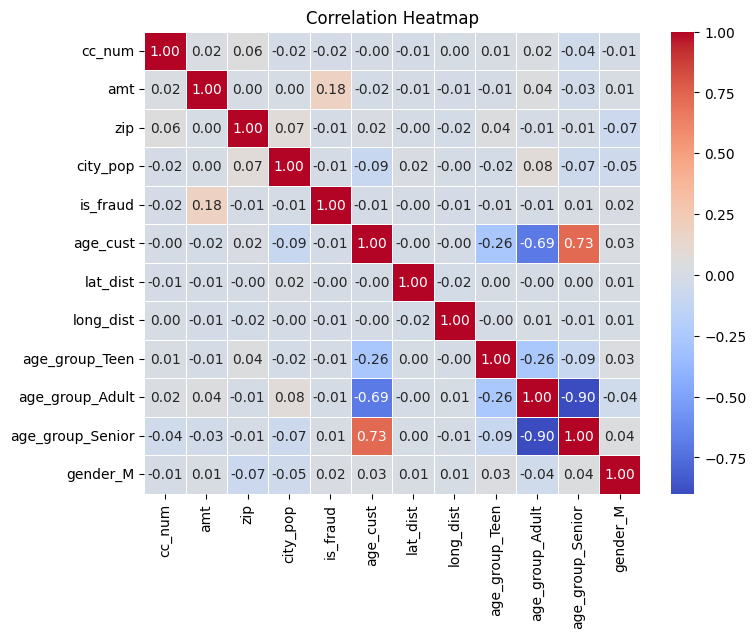

In [42]:
correlation_matrix = new_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
fraud_correlation = new_df.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud            1.000000
amt                 0.183866
gender_M            0.017552
cc_num              0.015522
long_dist           0.012581
age_group_Senior    0.011107
age_cust            0.010831
age_group_Teen      0.008172
zip                 0.008148
city_pop            0.006230
age_group_Adult     0.005963
lat_dist            0.001496
Name: is_fraud, dtype: float64


In [44]:
x = new_df.drop('is_fraud',axis = 1)
y = new_df['is_fraud']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=65)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with strategy 'mean', 'median', or 'most_frequent' depending on your preference
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, you can pass the imputed data to the predict method
y_pred = model.predict(X_test_imputed)

In [52]:
zero = new_df[new_df["is_fraud"]==0]
one = new_df[new_df["is_fraud"]==1]

In [53]:
down = resample(zero, replace=False, n_samples=len(one))
down

,cc_num,amt,zip,city_pop,is_fraud,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
6253,60427851591,72.14,73624,2142,0.0,44,0.26,0.95,0,1,0,1
3280,4657269323674365,75.00,32442,3699,0.0,72,0.07,0.02,0,0,1,0
1958,4862293128558,22.22,16839,489,0.0,64,0.65,0.21,0,0,1,0
10675,345832460465610,75.87,22151,104396,0.0,70,0.45,0.62,0,0,1,1
4791,4265776278887457,14.84,72047,969,0.0,66,0.71,0.21,0,0,1,0
10320,6506116513503136,209.38,75703,144160,0.0,36,1.00,0.49,0,1,0,0
7115,5289285402893489,60.82,97107,1530,0.0,34,0.13,0.66,0,1,0,0
11195,6544734391390261,93.82,46322,23727,0.0,38,0.20,0.67,0,1,0,1
2538,3558652751678952,75.23,75661,2807,0.0,89,0.23,0.79,0,0,1,0
4197,6011348830550197,7.90,35229,493806,0.0,40,0.42,0.19,0,1,0,1


In [54]:
down_samples = pd.concat([one, down], axis=0)
down_samples

,cc_num,amt,zip,city_pop,is_fraud,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
1685,3560725013359375,24.84,79759,23,1.0,51,0.72,0.14,0,1,0,0
1767,6564459919350820,780.52,53803,1306,1.0,62,0.09,0.80,0,0,1,1
1781,6564459919350820,620.33,53803,1306,1.0,62,0.22,0.19,0,0,1,1
1784,4005676619255478,1077.69,70726,71335,1.0,26,0.75,0.64,0,1,0,1
1857,3560725013359375,842.65,79759,23,1.0,51,0.54,0.00,0,1,0,0
1891,3524574586339330,22.55,32960,105638,1.0,34,0.76,0.42,0,1,0,0
1906,4005676619255478,1128.26,70726,71335,1.0,26,0.10,0.24,0,1,0,1
1956,4005676619255478,931.82,70726,71335,1.0,26,0.30,0.81,0,1,0,1
1968,4005676619255478,983.00,70726,71335,1.0,26,0.56,0.85,0,1,0,1
2026,6564459919350820,955.16,53803,1306,1.0,62,0.47,0.14,0,0,1,1


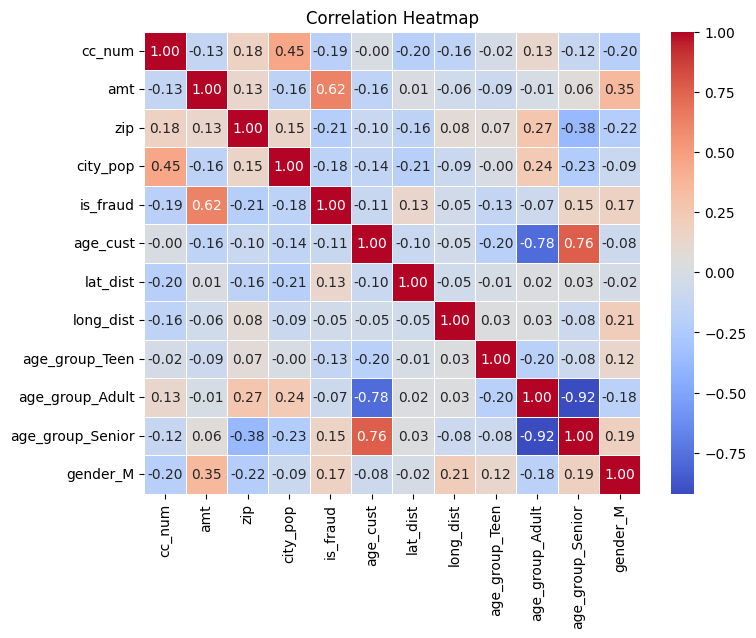

In [55]:

correlation_matrix = down_samples.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
fraud_correlation = down_samples.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud            1.000000
amt                 0.624126
zip                 0.213659
cc_num              0.188435
city_pop            0.176798
gender_M            0.172825
age_group_Senior    0.154303
lat_dist            0.134350
age_group_Teen      0.132453
age_cust            0.105219
age_group_Adult     0.074536
long_dist           0.046292
Name: is_fraud, dtype: float64


In [57]:
X_d = down_samples.drop("is_fraud", axis=1)
y_d = down_samples["is_fraud"]

In [58]:
X_tr, X_te, y_tr, y_te = train_test_split(X_d, y_d, train_size=0.8, random_state=65)

In [59]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

In [60]:
model1 = svm.SVC(kernel='linear')
model.fit(X_tr, y_tr)

SVC(kernel='linear')

In [61]:
y_pred1 = model.predict(X_te)

In [62]:
cm1 = confusion_matrix(y_te, y_pred1)

In [63]:
print("Confusion Matrix:\n", cm1)

Confusion Matrix:
 [[2 5]
 [0 5]]


In [64]:
print("Accuracy:", accuracy_score(y_te, y_pred1))

Accuracy: 0.5833333333333334


In [65]:
print("Classification Report:\n", classification_report(y_te, y_pred1))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.29      0.44         7
         1.0       0.50      1.00      0.67         5

    accuracy                           0.58        12
   macro avg       0.75      0.64      0.56        12
weighted avg       0.79      0.58      0.54        12

